In [2]:
!pip install sklearn

You should consider upgrading via the 'c:\users\neha s hatti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
conda install -c conda-forge category-encoders


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: category-encoders


In [4]:
!pip install --upgrade category_encoders

You should consider upgrading via the 'c:\users\neha s hatti\anaconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: category-encoders
    Found existing installation: category-encoders 2.2.2
    Uninstalling category-encoders-2.2.2:
      Successfully uninstalled category-encoders-2.2.2


In [5]:
import numpy as np
import pandas as pd
import category_encoders as ce
import seaborn as sns


from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit


# Data Analysis

In [75]:
df = pd.read_excel(r'C:\Users\Neha S Hatti\Downloads\Data_Cortex_Nuclear.xls')
df.head(50)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [8]:
df['MouseID'].value_counts()

321_6        1
3426_11      1
3507_7       1
J2292_4      1
50810A_12    1
            ..
3488_12      1
3412_4       1
3498_11      1
J2292_5      1
3500_7       1
Name: MouseID, Length: 1080, dtype: int64

In [9]:
df['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [10]:
df['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [11]:
df['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [12]:
df['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-SC-s    135
t-SC-m    135
t-SC-s    135
t-CS-m    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64

In [13]:
list_columns = ['MouseID','Genotype','Treatment','Behavior','class']
ceo_ohe = ce.OrdinalEncoder(cols=list_columns,handle_unknown='impute')
df_data = ceo_ohe.fit_transform(df)
df_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,1,1,1,1
1,2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,1,1,1,1
2,3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,1,1,1,1
3,4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,1,1,1,1
4,5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,1,1,1,1


In [14]:
df_data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

# Data Visualization

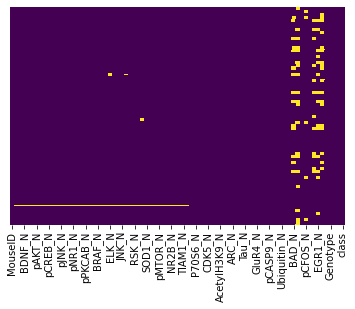

In [15]:
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
df_data.describe(include='all')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
count,1080.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,540.50000,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,...,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784,1.472222,1.472222,1.513889,4.347222
std,311.91345,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,...,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126,0.499459,0.499459,0.500039,2.305410
min,1.00000,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,...,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479,1.000000,1.000000,1.000000,1.000000
25%,270.75000,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,...,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423,1.000000,1.000000,1.000000,2.000000
50%,540.50000,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,...,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441,1.000000,1.000000,2.000000,4.000000
75%,810.25000,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,...,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824,2.000000,2.000000,2.000000,6.000000
max,1080.00000,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,...,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791,2.000000,2.000000,2.000000,8.000000


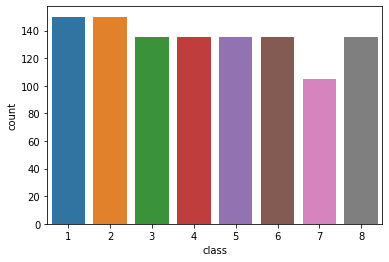

In [17]:
sns.countplot(data=df_data, x='class')


In [18]:
df_data=df_data.dropna()
df_data.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [19]:
n=len(df_data)
print(n)

552


In [76]:
df_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,76,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,1,1,1,1
76,77,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,1,1,1,1
77,78,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,1,1,1,1
78,79,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,1,1,1,1
79,80,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,1,1,1,1


# Feature Engineering

In [23]:
train = df_data[0:(n//10)*8]
test = df_data[(n//10)*8:]

In [24]:
y_train0 = train['class']
y_test0 = test['class']
X_train0 = train.drop('class', axis = 1)
X_test0 = test.drop('class', axis = 1)

In [26]:
from xgboost import XGBClassifier

In [27]:
X = np.array(X_train0)
y = np.array(y_train0)
clf = XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.01)
ss = ShuffleSplit(n_splits=5,train_size=0.8,test_size =0.2,random_state=0) 

for train_index, test_index in ss.split(X): 

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    clf.fit(X_train, Y_train) 
    print(clf.score(X_test, Y_test))

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[19:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[19:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[19:36:55] WARNING: C:/Users/Administrator/workspace/xg

pred0 = clf.predict(np.array(X_test0))
PRED=pred0
ANS=y_test0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)


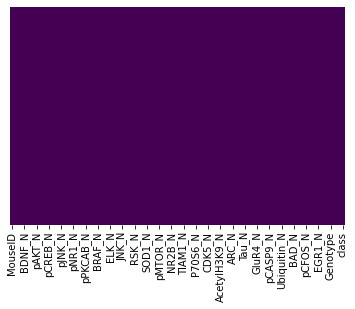

In [28]:
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
df_data.describe(include='all')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,592.885870,0.415237,0.623114,0.314997,2.295162,3.784337,0.224512,0.175432,3.621378,0.208297,...,0.129813,0.444730,0.160919,0.178470,0.193974,1.378386,1.538043,1.538043,1.483696,4.711957
std,285.664849,0.163400,0.182722,0.053330,0.368030,0.923291,0.038518,0.025434,1.382951,0.035955,...,0.020329,0.071323,0.059803,0.035793,0.045525,0.325794,0.499003,0.499003,0.500187,2.171086
min,76.000000,0.145327,0.245359,0.115181,1.330831,1.737540,0.121000,0.107649,1.343998,0.112812,...,0.085419,0.260146,0.079691,0.120911,0.101787,0.788462,1.000000,1.000000,1.000000,1.000000
25%,378.750000,0.290813,0.480525,0.279022,2.043939,3.117845,0.197352,0.156664,2.483521,0.182747,...,0.114627,0.393957,0.121338,0.153495,0.161997,1.104007,1.000000,1.000000,1.000000,3.000000
50%,636.500000,0.372140,0.590304,0.308487,2.284651,3.707866,0.220609,0.176103,3.369865,0.206746,...,0.126450,0.446862,0.148369,0.171166,0.186791,1.365746,2.000000,2.000000,1.000000,5.000000
75%,864.250000,0.495701,0.730608,0.346982,2.543829,4.342682,0.247837,0.192511,4.596407,0.234116,...,0.142257,0.488006,0.182076,0.197165,0.217658,1.631619,2.000000,2.000000,2.000000,7.000000
max,1050.000000,0.992220,1.336398,0.497160,3.757641,8.482553,0.353783,0.317066,7.104642,0.306247,...,0.205876,0.759588,0.479763,0.360692,0.372005,2.129791,2.000000,2.000000,2.000000,8.000000


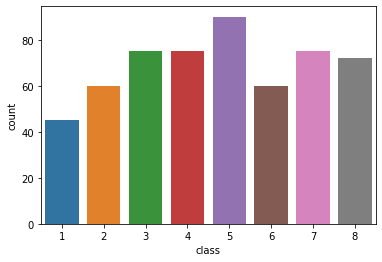

In [30]:
sns.countplot(data=df_data, x='class')



# Machine Learning Algorithms

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model


In [80]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
Prediction=logmodel.predict(X_test)

In [96]:
accuracy=confusion_matrix(Y_test,Prediction)


In [97]:
accuracy

array([[ 6,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  1,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [98]:
accuracy=accuracy_score(Y_test,Prediction)
accuracy

0.9886363636363636

In [99]:
Prediction

array([3, 5, 3, 4, 5, 2, 1, 3, 5, 6, 5, 5, 6, 6, 6, 3, 3, 4, 5, 4, 6, 6,
       4, 4, 4, 4, 6, 4, 6, 2, 5, 1, 2, 4, 4, 3, 1, 3, 7, 6, 4, 5, 2, 6,
       6, 6, 6, 6, 3, 5, 3, 2, 6, 2, 2, 4, 3, 6, 7, 7, 5, 1, 5, 5, 1, 5,
       3, 5, 4, 4, 5, 2, 4, 1, 3, 6, 2, 2, 4, 3, 4, 5, 3, 3, 2, 2, 4, 4])

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [102]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [103]:
classifier.score(X_train,Y_train)

1.0

In [104]:
classifier.score(X_test,Y_test)

1.0

In [105]:
prediction=classifier.predict(X_test)
prediction

array([3, 5, 3, 4, 5, 2, 1, 3, 5, 6, 5, 5, 6, 6, 6, 3, 3, 4, 5, 4, 6, 6,
       4, 4, 4, 4, 6, 4, 6, 2, 5, 1, 2, 4, 4, 3, 1, 3, 7, 6, 4, 5, 2, 6,
       6, 6, 6, 6, 3, 5, 3, 2, 6, 2, 2, 2, 3, 6, 7, 7, 5, 1, 5, 5, 1, 5,
       3, 5, 4, 4, 5, 2, 4, 1, 3, 6, 2, 2, 4, 3, 4, 5, 3, 3, 2, 2, 4, 4])

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [108]:
classifier.score(X_train,Y_train)

1.0

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [111]:
classifier.score(X_train,Y_train)

1.0

In [112]:
!pip3 install xgboost 

You should consider upgrading via the 'c:\users\neha s hatti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [113]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [114]:
model = XGBClassifier()
model.fit(X_train,Y_train)

[20:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Neha S Hatti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
model.score(X_train,Y_train)

1.0

In [116]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model_1=pickle.load(open('model.pkl', 'rb'))

In [117]:
from sklearn import metrics
print('mean absolute error : ', metrics.mean_absolute_error(Y_test, Prediction))
print('mean squared error: ', metrics.mean_squared_error(Y_test, Prediction))
print('root mean squared error : ', np.sqrt(metrics.mean_squared_error(Y_test, Prediction)))

mean absolute error :  0.022727272727272728
mean squared error:  0.045454545454545456
root mean squared error :  0.21320071635561044
